# K Means Clustering

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline
sns.set_style('darkgrid')

## Reading in the Data

In [2]:
data = pd.read_csv('Iris.csv', index_col='Id')

In [3]:
X = data.iloc[:, :-1]

In [4]:
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2


## Using the Elbow method to Find the best number of Clusters

In [6]:
from sklearn.cluster import k_means

In [7]:
#cen = cluster centeroid
#klab = labels
#kss = inertia(sum of squared distances to the closest centroid for all observations in the training set)

kmeans = []

for i in range(1, 11):
    cen, klab, kss  = k_means(X.values, n_clusters=i, random_state=0)
    kmeans.append(kss)

C:\Users\queency\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

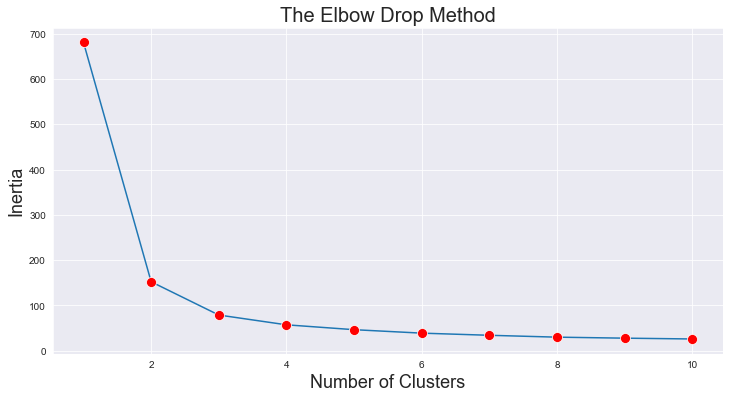

In [8]:
#Visualizing the elbow drop to identify the optimum cluster number

plt.figure(figsize=(12,6))
plt.title('The Elbow Drop Method', fontdict={'size':20})
sns.lineplot(x=range(1,11), y=kmeans, marker='o', markersize=10, markerfacecolor='r')
plt.xlabel('Number of Clusters', fontdict={'size':18})
plt.ylabel('Inertia', fontdict={'size':18})

From the drop, the optimum number of clusters we'd use is 3

## Representing the Optimum Number of Clusters

In [9]:
cen, klab, kss  = k_means(X.values, n_clusters=3, random_state=0)

Text(0.5, 0, 'Sepal Length (cm)')

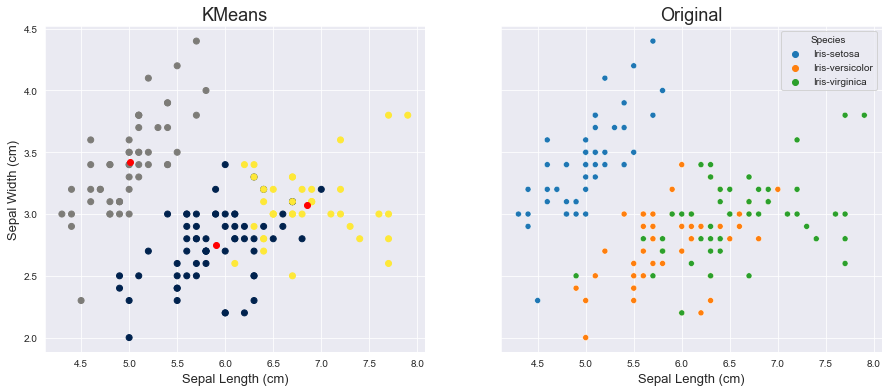

In [10]:
#PLotting the first 2 columns i.e sepal length vs sepal width and comparing the clustering I got to the clustering
#in the original data. The points in red are the centeroids

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(15,6))

ax1.set_title('KMeans', fontdict={'size':18})
ax1.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=klab, cmap='cividis')
ax1.scatter(cen[:, 0], cen[:, 1], c='red')
ax1.set_xlabel('Sepal Length (cm)', fontdict={'size':13})
ax1.set_ylabel('Sepal Width (cm)', fontdict={'size':13})

ax2.set_title('Original', fontdict={'size':18})
sns.scatterplot(
    x=X['SepalLengthCm'],
    y=X['SepalWidthCm'],
    hue = data['Species'])
ax2.set_xlabel('Sepal Length (cm)', fontdict={'size':13})

Text(0.5, 0, 'Petal Length (cm)')

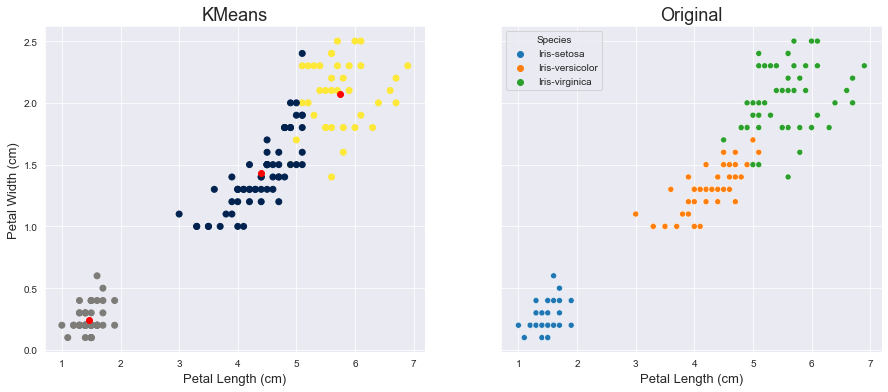

In [11]:
#PLotting the last 2 columns i.e petal length vs petal width and comparing the clustering I got to the clustering
#in the original data. The points in red are the centeroids

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(15,6))

ax1.set_title('KMeans', fontdict={'size':18})
ax1.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=klab, cmap='cividis')
ax1.scatter(cen[:, 2], cen[:, 3], c='red')
ax1.set_xlabel('Petal Length (cm)', fontdict={'size':13})
ax1.set_ylabel('Petal Width (cm)', fontdict={'size':13})

ax2.set_title('Original', fontdict={'size':18})
sns.scatterplot(
    x=X['PetalLengthCm'],
    y=X['PetalWidthCm'],
    hue = data['Species'])
ax2.set_xlabel('Petal Length (cm)', fontdict={'size':13})